# Part C

## 1.Reading the CSV file.

In [166]:
import numpy as np
import pandas as pd

from datetime import datetime, date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [167]:
df1 = pd.read_csv('CompanyX_EU.csv') #1.Reading the csv file.

In [168]:
df1

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


## 2.Data Exploration:

###  A. Checking datatypes of each attriute.

In [169]:
df1.dtypes #2 A) Checking datatypes of each attriute.

Startup           object
Product           object
Funding           object
Event             object
Result            object
OperatingState    object
dtype: object

### B. Checking for NULL values in the attributes.

In [170]:
df1.isnull() #2 B) Checking for NULL values in the attributes.

,Startup,Product,Funding,Event,Result,OperatingState
0,False,False,True,False,False,False
1,False,False,False,False,False,False
2,False,False,True,False,False,False
3,False,False,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
657,False,False,False,False,False,False
658,False,False,False,False,False,False
659,False,False,False,False,False,False
660,False,False,False,False,False,False


In [171]:
df1.isnull().sum() #Total totl values of the attributes.

Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64

## 3. Data preprocessing & visualization:

### A. Dropping the null values (Dropping the records/rows that have NULL values).

In [172]:
df1.dropna(inplace=True) #3 A) Dropping the null values (Dropping the records/rows that have NULL values).

In [173]:
df1

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


### B. Converting the 'Funding' features a numerical value.

In [174]:
df1.loc[:,'Funds_in_million'] = df1['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))    #3 B) Converting the 'Funding' features a numerical value.

In [175]:
#df1['Funding'] = df1['Funding'].replace("K":"*1e3", "M":"*1e6", regex=True).astype(float)

In [176]:
df1

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


### C. Box plot for column 'Funds_in_million'.

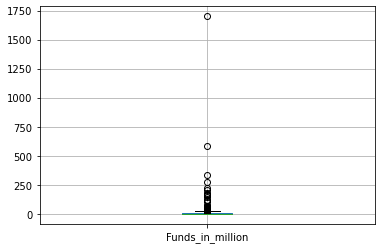

In [177]:
plot1 = df1.boxplot(column=['Funds_in_million']) #3 C) Box plot for column 'Funds_in_million'.

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


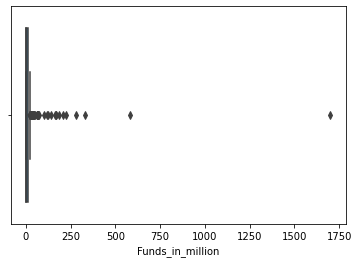

In [178]:
plot2=sns.boxplot(df1['Funds_in_million']) #3 C) Box plot for column 'Funds_in_million' using seaborn.

### D. Checking the number of outliers than the upper fence. 

In [179]:
#3 D) Checking the number of outliers than the upper fence.

### E. Checking frequency of the OperatingState features classes.

In [180]:
df1['OperatingState'].value_counts() #3 E) Checking frequency of the OperatingState features classes.

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

### There are 319 Operating companies, 66 Acquired companies, 57 Closed companies and 4 Ipo companies.

## 4. Statistical Analysis

In [181]:
companies_status = df1.groupby('OperatingState')

In [182]:
companies_status.sum()

,Funds_in_million
OperatingState,
Acquired,872.0510
Closed,185.7157
Ipo,551.1000
Operating,6080.8372


### A. Yes there is a significant difference in Funds raised between companies that are still opened and companies that are being closed down.(i.e): Operating companies have raised 6080.8372 millions and companies that have been closed raised just 185.7157 millions.

### Creating two copies of dataset where one has NULL values filled with 0's and another copies does not have NULL values (columns with Null values have been dropped).

In [183]:
df1_with_null = pd.read_csv('CompanyX_EU.csv')
df1_with_null = df1_with_null.fillna(0) #Replacing NaN with '0'
df1_with_null

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,0,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,0,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,0,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [184]:
df1_without_null = pd.read_csv('CompanyX_EU.csv')
df1_without_null = df1_without_null.dropna()
df1_without_null

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [185]:
df1 #Dataset where we have already added an extra column called 'Funds_in_million' and dropped null values.

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


In [186]:
df1_with_null

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,0,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,0,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,0,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [187]:
df1_without_null

,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [188]:
df1_with_null.nunique()

Startup           662
Product           657
Funding           241
Event              26
Result              5
OperatingState      4
dtype: int64

In [189]:
df1_without_null.nunique()

Startup           446
Product           446
Funding           239
Event              26
Result              5
OperatingState      4
dtype: int64

In [190]:
df1.nunique()

Startup             446
Product             446
Funding             239
Event                26
Result                5
OperatingState        4
Funds_in_million    239
dtype: int64

### B. The Null hypothesis  (H0) and Alternative hypopthesis (Ha)::

#### The Inpendent variables columns affect Dependent variables column 'Funds_in_million'. Which means if null values are dropped, the dependent variables attribute 'Funds_in_million' that we have created will be decreased from frequency of 241 to 239. 

#### Hence there is no NULL hypothesis since since variables of a dependent attribute can be affected.

### C. Testing for significance and conclusion.

### Significance and Conclusion : 

#### 1 - There is a significant difference in Funds raised between companies that are still opened and companies that are being closed down.(i.e): Operating companies have raised 6080.8372 millions and companies that have been closed raised just 185.7157 millions.

#### 2 - Columns with Null values can affect the Dependent variable. Which means if we drop the columns that have Null value, the total count (frequence) of millions in 'Funds_in_million' will be decreased from 241 to 239.




### D. Copy of the original dataframe.

In [191]:
df1_copy = pd.read_csv('CompanyX_EU.csv')
df1_copy

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [192]:
df1['OperatingState'].value_counts()

Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64

(array([312.,   0.,  25.,   0.,   0.,  65.,   0.,  25.,   0.,  19.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

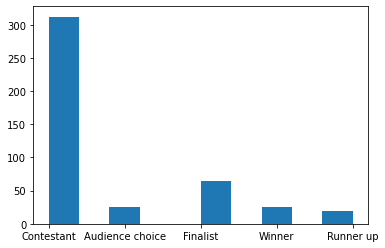

In [193]:
plt.hist(df1['Result'])

### E.The frequency distribution of Result variables are drawn above where Operating companies have the most high frequency.

### F. Calculating percentage of winners that are still operating and contestants that are still operating.

In [194]:
result = df1.groupby(['Result','OperatingState']).describe()
result

Funds_in_million                          \
                                          count        mean         std   
Result          OperatingState                                            
Audience choice Closed                      2.0    1.595000    1.986970   
                Operating                  23.0   21.538013   48.480902   
Contestant      Acquired                   45.0    9.752911   15.903357   
                Closed                     50.0    3.140514    5.765642   
                Ipo                         3.0  161.700000  153.531658   
                Operating                 214.0   17.245804  119.197322   
Finalist        Acquired                   13.0   15.111538   14.897681   
                Closed                      5.0    5.100000    8.785784   
                Ipo                         1.0   66.000000         NaN   
                Operating                  46.0   25.997226   89.806214   
Runner up       Acquired                    1.0   16.500000         NaN   
                Operating                  18.0   19.288150   41.643980   
Winner          Acquired                    7.0   31.460000   49.726584   
                Operating                  18.0   19.544544   25.365468   

                                                                               
                                    min       25%       50%       75%     max  
Result          OperatingState                                                 
Audience choice Closed           0.1900   0.89250    1.5950    2.2975     3.0  
                Operating        0.0200   1.00000    2.1000    4.7000   168.8  
Contestant      Acquired         0.0200   1.00000    3.0000   12.0000    69.0  
                Closed           0.0930   0.38125    0.9085    3.5000    35.5  
                Ipo             34.9000  76.35000  117.8000  225.1000   332.4  
                Operating        0.0050   0.59250    1.8500    5.7000  1700.0  
Finalist        Acquired         0.1500   6.30000   10.3000   17.4000    44.7  
                Closed           0.7000   1.00000    1.2000    1.8000    20.8  
                Ipo             66.0000  66.00000   66.0000   66.0000    66.0  
                Operating        0.0500   1.10000    4.6500   16.0750   583.6  
Runner up       Acquired        16.5000  16.50000   16.5000   16.5000    16.5  
                Operating        0.0857   1.52500    7.2500   21.1250   182.1  
Winner          Acquired         0.5200   8.70000   10.5000   24.9000   142.0  
                Operating        0.0550   1.70000   11.5500   32.9500   103.0

In [195]:
total = 25+312+65+19+25 #The total of Result attribute
total

446

In [196]:
operating_winner_percentage = (18/446)*100
operating_winner_percentage

4.0358744394618835

In [197]:
operating_contestant_percentage = (214/446)*100
operating_contestant_percentage

47.98206278026906

### F. Percentages :
#### Percentage of winners that are still operating - 4.0%
#### Percentage of contestants that are still operating - 48% or 47.98%

### G. Hypothesis of comparing the proportion of companies that are operating between winners and contestants.

#### The companies that have winners are lesser than the companies that have contestants 

### H. Testing significance and conclusion:

#### There is a lot significant difference between winners and contestants them are still operating and Percentage of winners that are still operating is 4.0% and Percentage of contestants that are still operating is 48% or 47.98%

### I. Event that has ‘disrupt’ keyword from 2013 onwards.

In [210]:
 df1. loc[df1['Event'] <= 'Disrupt SF '  ]

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
14,Aiden,aiden.ai,$750K,Disrupt London 2016,Contestant,Operating,0.75
18,AirHelp,airhelp.com,$12.2M,Disrupt NYC 2014,Contestant,Operating,12.20
...,...,...,...,...,...,...,...
641,Workspot,workspot.com,$15.8M,Disrupt NYC 2013,Contestant,Operating,15.80
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.90
654,ZEFR,zefr.com,$62.1M,Disrupt NYC 2010,Contestant,Operating,62.10
656,Zenefits,zenefits.com,$583.6M,Disrupt NYC 2013,Finalist,Operating,583.60


### I. The above records has only ‘disrupt’ keyword from 2013 onwards.

   # END